---

Monte Carlo Simulation for Fintech Class. (Paris 2020)

https://www.investopedia.com/terms/m/montecarlosimulation.asp

----

In [13]:

def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    token_price : float
        initial token value // token price per unit
    r : float
        constant short rate // Lending rate, discount cashflow rate, expected ROI, 
    sigma : float
        constant volatility // standard deviation 
    T : float
        final time horizon // end time 
    M : int
        number of time steps/intervals 
    I : int
        number of paths to be simulated 
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = token_price
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [14]:
token_price = 100.
r = 0.05
sigma = 0.2
T = 2
M = 1000
I = 42

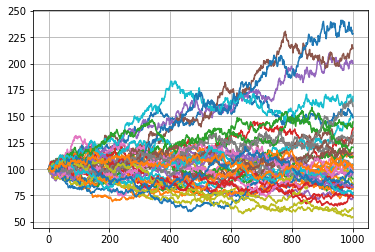

In [15]:
fig = gen_paths(token_price, r, sigma, T, M, I)
plt.plot(fig[:, :100])
plt.grid(True)
#plt.xlabel('time steps')
#plt.ylabel('index level')
# tag: normal_sim_1
# title: 10 simulated paths of geometric Brownian motion